# Generate Hemodynamic Regressor

We will generate one hemodynamic regressor using the SPM HRF model.

## Install Nilearn

In [1]:
!pip install -q nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 73.9 MB/s eta 0:00:00


## Nilearn **`compute_regressor`** Function

The Nilearn **`compute_regressor`** is a core utility function used to generate hemodynamic regressors by convolving experimental events with a Hemodynamic Response Function.

It is the core engine behind building first-level design matrices for fMRI analysis.

The function takes event timing data (onsets, duration, amplitudes) and transforms them into the predicted BOLD signal time-series used as predictors in firsl level General Linear Model.

### Key Parameters

* **`exp_condition`**: A tuple of three arrays (onsets, durations, amplitudes) defining the stimulus events.
* **`hrf_model`**: The model used to simulate the hemodynamic response. Common options include:
    * **`'spm'`**: Standard SPM HRF.
    * **`'glover'`**: The Glover HRF model.
    * **`'spm + derivative'`**: Includes a time derivative to account for slight timing shifts.
    * **`'fir'`**: Finite Impulse Response basis for more flexible shapes.
* **`frame_times`**: An array of the acquisition times (in seconds) for each fMRI volume.

### Returns

* **`regressor`**: A 2D NumPy array of shape (**`n_frames`**, **`n_regressors`**). It contains the convolved time series for the specified condition.

## Imports

In [2]:
from nilearn.glm.first_level import compute_regressor

import matplotlib.pyplot as plt
import numpy as np

## Simulate Time Course and Stimulus Event

To get an impulse response, we simulate a single stimulus event occurring at time t=0, with duration 1s and amplitude 1.

In [3]:
# simulate time course of 30s
frame_times = np.linspace(0, 30.0, 61)

# set stimulus event parameters
onset, duration, amplitude = 0.0, 1.0, 1.0
exp_condition = np.array((onset, duration, amplitude)).reshape(3, 1)

## Generate Regressor

We use the **`compute_regressor`** function to generate a regressor.

In [4]:
# generate regressor
regressor = compute_regressor(exp_condition, 'spm', frame_times)

The **`compute_regressor`** function returns a tuple of NumPy arrays.

In [5]:
print(type(regressor))

<class 'tuple'>


In our example, the tuple has only one element.

Check regressor shape:

In [6]:
# check regressor shape
print(type(regressor[0]))
print(regressor[0].shape)

<class 'numpy.ndarray'>
(61, 1)


Plot the regressor:

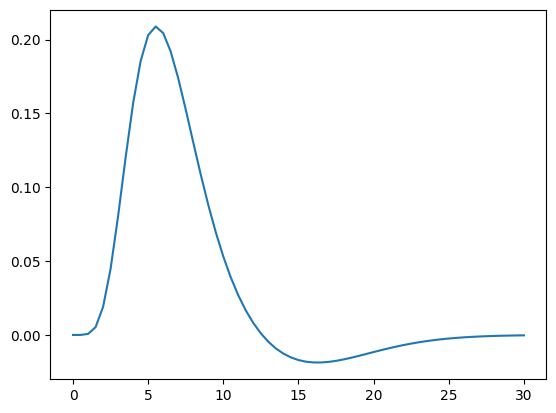

In [7]:
# plot the regressor
plt.plot(frame_times, regressor[0])